In [1]:
#imports
from scipy import stats
import sympy as sp
import numpy as np
import pandas as pd

#plots
import matplotlib.pyplot as plt
import seaborn as sns

## Creating Function

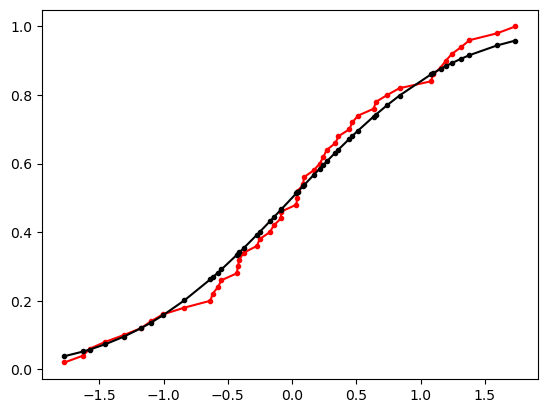

In [66]:
# simulate H0
#use standard normal parameters
mu = 0
sigma = 1
n= 50 #samples per simulation
m = 1 #number of simulations 

D = np.zeros(m)

for i in range(m):
    sample = np.sort(np.random.normal(mu, sigma, n))
    emp_cdf = np.arange(1, n+1) / n
    null_cdf = stats.norm.cdf(sample, loc=mu, scale=sigma)
    D[i] = np.max(np.abs(emp_cdf - null_cdf))  #test-statistic
    plt.plot(sample,emp_cdf,'r.-')
    plt.plot(sample,null_cdf,'k.-')
#95% critical value
ks_crit = np.percentile(D, 95)

In [27]:
# simulate H0
#use standard normal parameters
mu = 0
sigma = 1
n= 100 #samples per simulation
m = 1000 #number of simulations 

D = np.zeros(m)

for i in range(m):
    sample = np.sort(np.random.normal(mu, sigma, n))
    emp_cdf = np.arange(1, n+1) / n
    null_cdf = stats.norm.cdf(sample, loc=mu, scale=sigma)
    D[i] = np.max(np.abs(emp_cdf - null_cdf))  #test-statistic

#95% critical value
ks_crit = np.percentile(D, 95)

In [28]:
data = np.random.normal(mu, sigma, size=n)  #observed data
data_sorted = np.sort(data)
empirical_cdf = np.arange(1, n+1) / n
null_cdf = stats.norm.cdf(data_sorted, loc=mu, scale=sigma)
ks_observed = np.max(np.abs(empirical_cdf - null_cdf))  #observed KS statistic

#compute p-value
p_value = np.mean(D >= ks_observed)  #proportion of KS statistics >= observed KS
indicator(p_value)

'Fail to Reject H0'

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


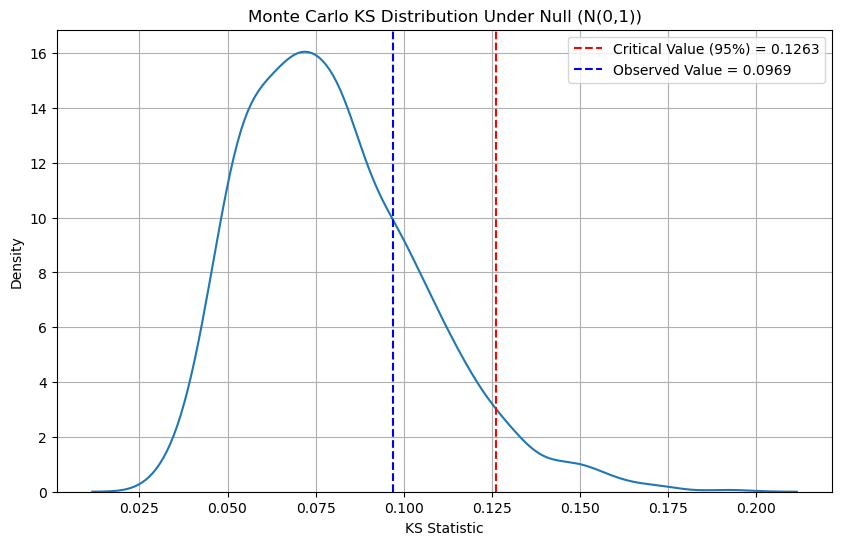

In [11]:
plt.figure(figsize=(10,6))
sns.kdeplot(D) #can change to hist to show bins
plt.axvline(ks_crit, color='red', linestyle='--', label=f"Critical Value (95%) = {ks_crit:.4f}")
plt.axvline(ks_observed, color='blue', linestyle='--', label=f"Observed Value = {ks_observed:.4f}")
plt.title("Monte Carlo KS Distribution Under Null (N(0,1))")
plt.xlabel("KS Statistic")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
def indicator(p_value, alpha=0.05):
    if p_value < alpha:
        return "Reject H0"
    else:
        return "Fail to Reject H0"

In [3]:
def ks_test(data, mu, sigma, n, m, crit_val_perc):
    """
    Function to simulate the probability density of a KS-Test using Monte Carlo.
    ---
    Parameters: 'data' is the observed data.
                'mu' is the chosen mean of the distribution.
                'n' is the # of samples per simulation.
                'm' is the # of simulations.
                'crit_val_perc' is the percentile of which the critical value will be calculated.
    Returns:
        - critical value of null hypothesis 'ks_crit'
        - observed ks-statistic
        - p_value
        - indicator whether to reject the null hypothesis
    """
    D = np.zeros(m)

    for i in range(m):
        sample = np.sort(np.random.normal(mu, sigma, n))
        emp_cdf = np.arange(1, n+1) / n
        null_cdf = stats.norm.cdf(sample, loc=mu, scale=sigma)
        D[i] = np.max(np.abs(emp_cdf - null_cdf))  #test-statistic

    #__% critical value
    ks_crit = np.percentile(D, crit_val_perc)

    data_sorted = np.sort(data)
    empirical_cdf = np.arange(1, n+1) / n
    null_cdf = stats.norm.cdf(data_sorted, loc=mu, scale=sigma)
    ks_observed = np.max(np.abs(empirical_cdf - null_cdf))  #observed KS statistic

    #empirical p-value
    p_value = np.mean(D >= ks_observed)
    return {"D": D, "ks_crit": ks_crit, "ks_observed": ks_observed, "p_value": p_value, "indicator_fn": indicator(p_value)}

In [14]:
#simulate random data to test function
data = np.random.normal(mu, sigma, size=100) 

In [15]:
ks_values = ks_test(data, 0, 1, 100, 1000, 95)

In [16]:
ks_values['ks_crit']

0.13484122422317985

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


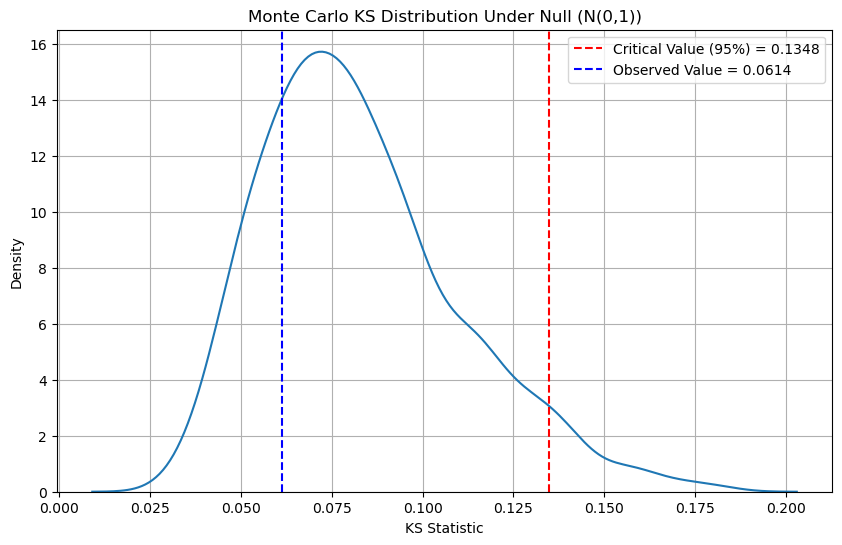

In [17]:
plt.figure(figsize=(10,6))
sns.kdeplot(ks_values['D']) #can change to hist to show bins
plt.axvline(ks_values['ks_crit'], color='red', linestyle='--', label=f"Critical Value (95%) = {ks_values['ks_crit']:.4f}")
plt.axvline(ks_values['ks_observed'], color='blue', linestyle='--', label=f"Observed Value = {ks_values['ks_observed']:.4f}")
plt.title("Monte Carlo KS Distribution Under Null (N(0,1))")
plt.xlabel("KS Statistic")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

## Testing Hypothesis Test

Test to see if the k-s function we created properly rejects 5% of the data with a 5% rejection region with normal random data.

In [82]:
mu, sigma = 0, 1
n_trials = 1000
sample_size = 1000
m_simulations = 1000 

rejections = []
for i in range(n_trials):
    data = np.random.normal(mu, sigma, size=sample_size)
    result = ks_test(data, mu, sigma, sample_size, m_simulations, 95)
    rejections.append(result['indicator_fn'])

In [83]:
reject_count = rejections.count('Reject H0')
rejection_rate = reject_count/len(rejections)

rejection_rate

0.051

Now seeing what happens when we use non-normal data. 

Here, I will be using autocorrelated data to show that the test fails.

In [5]:
def generate_ar1(n, phi=0.8, mu=0, sigma=1.0, x0=0):
    """
    Generate AR(1) autocorrelated data.
    n: Number of time points
    phi: Autocorrelation coefficient (between -1 and 1)
    sigma: Std. dev. of the noise
    x0: Initial value
    """
    x = np.zeros(n)
    x[0] = x0
    for t in range(1, n):
        x[t] = phi * x[t - 1] + np.random.normal(mu, sigma)
    return x

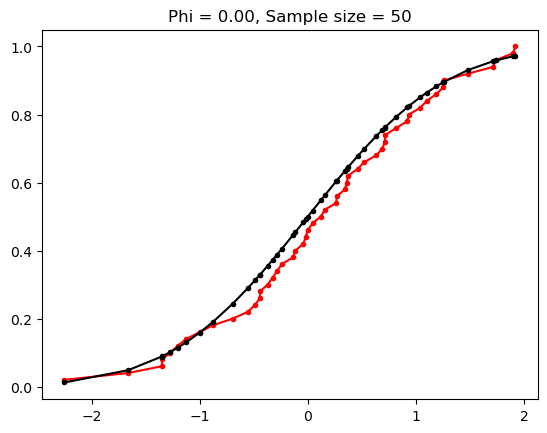

In [70]:
#see cdf and pdf for phi = 0
#use standard normal parameters
mu = 0
sigma = 1
sample_size = 50 #samples per simulation
m = 1 #number of simulations 
phi_val = 0

D = np.zeros(m)

for i in range(m):
    #need to sort the data so the largest vals of empirical - largest corresp. val of the null cdf 
    data = np.sort(generate_ar1(n = sample_size, phi = phi_val))
    emp_cdf = np.arange(1, sample_size+1) / sample_size
    null_cdf = stats.norm.cdf(data, loc=mu, scale=sigma)
    D[i] = np.max(np.abs(emp_cdf - null_cdf))  #test-statistic
    plt.plot(data,emp_cdf,'r.-')
    plt.plot(data,null_cdf,'k.-')
plt.title('Phi = %.2f, Sample size = %2d' % (phi_val, sample_size))
#95% critical value
ks_crit = np.percentile(D, 95)

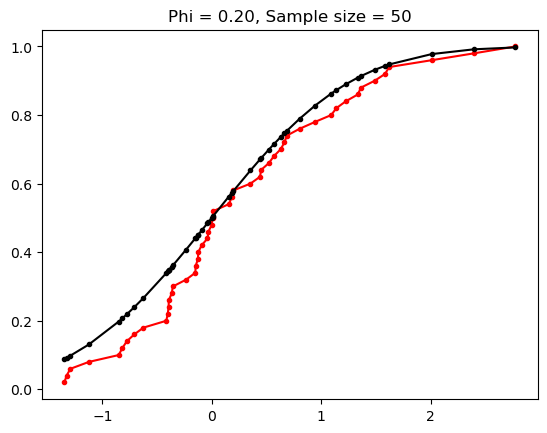

In [71]:
#see cdf and pdf for phi = 0.2
#use standard normal parameters
mu = 0
sigma = 1
sample_size = 50 #samples per simulation
m = 1 #number of simulations 
phi_val = 0.2

D = np.zeros(m)

for i in range(m):
    data = np.sort(generate_ar1(n = sample_size, phi = phi_val))
    emp_cdf = np.arange(1, sample_size+1) / sample_size
    null_cdf = stats.norm.cdf(data, loc=mu, scale=sigma)
    D[i] = np.max(np.abs(emp_cdf - null_cdf))  #test-statistic
    plt.plot(data,emp_cdf,'r.-')
    plt.plot(data,null_cdf,'k.-')
plt.title('Phi = %.2f, Sample size = %2d' % (phi_val, sample_size))
#95% critical value
ks_crit = np.percentile(D, 95)

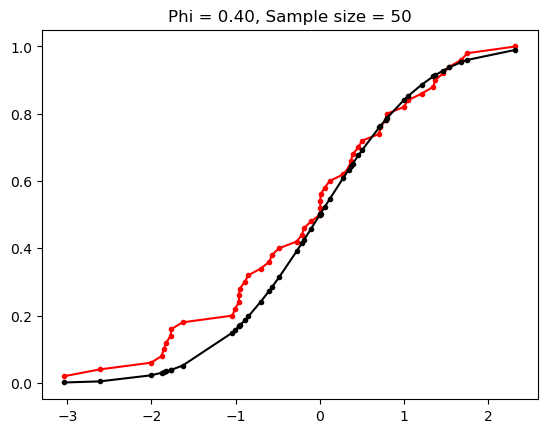

In [72]:
#see cdf and pdf for phi = 0.4
#use standard normal parameters
mu = 0
sigma = 1
sample_size = 50 #samples per simulation
m = 1 #number of simulations 
phi_val = 0.4

D = np.zeros(m)

for i in range(m):
    data = np.sort(generate_ar1(n = sample_size, phi = phi_val))
    emp_cdf = np.arange(1, sample_size+1) / sample_size
    null_cdf = stats.norm.cdf(data, loc=mu, scale=sigma)
    D[i] = np.max(np.abs(emp_cdf - null_cdf))  #test-statistic
    plt.plot(data,emp_cdf,'r.-')
    plt.plot(data,null_cdf,'k.-')
plt.title('Phi = %.2f, Sample size = %2d' % (phi_val, sample_size))
#95% critical value
ks_crit = np.percentile(D, 95)

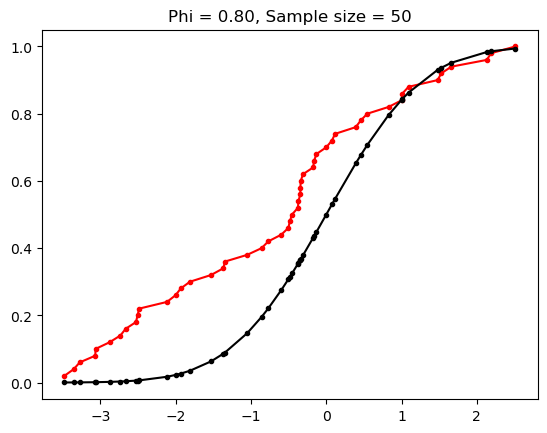

In [73]:
#see cdf and pdf for phi = 0.8
#use standard normal parameters
mu = 0
sigma = 1
sample_size = 50 #samples per simulation
m = 1 #number of simulations 
phi_val = 0.8

D = np.zeros(m)

for i in range(m):
    data = np.sort(generate_ar1(n = sample_size, phi = phi_val))
    emp_cdf = np.arange(1, sample_size+1) / sample_size
    null_cdf = stats.norm.cdf(data, loc=mu, scale=sigma)
    D[i] = np.max(np.abs(emp_cdf - null_cdf))  #test-statistic
    plt.plot(data,emp_cdf,'r.-')
    plt.plot(data,null_cdf,'k.-')
plt.title('Phi = %.2f, Sample size = %2d' % (phi_val, sample_size))
#95% critical value
ks_crit = np.percentile(D, 95)

In [10]:
#diff phi for autocorrelation
phi_vals = [0, 0.2, 0.4, 0.8]
mu, sigma = 0, 1
n_trials = 1000
sample_size = 1000
m_simulations = 1000 

rejection_rates = []
for i in range(len(phi_vals)):
    rejections = []
    for j in range(n_trials):
        data = generate_ar1(n = sample_size, phi = phi_vals[i])
        result = ks_test(data, mu, sigma, sample_size, m_simulations, 95)
        rejections.append(result['indicator_fn'])
    
    reject_count = rejections.count('Reject H0')
    rejection_rate = reject_count/len(rejections)
    rejection_rates.append(rejection_rate)

In [54]:
#note: the cell above ran very slow, limit how many times it ran
rejection_rates

[0.044, 0.1, 0.442, 1.0]

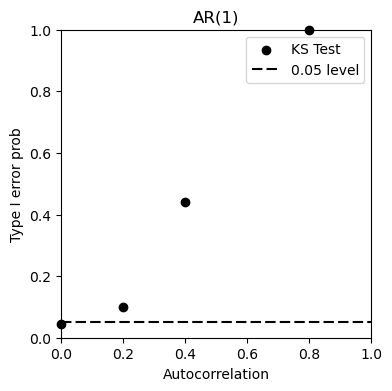

In [53]:
fig, ax = plt.subplots(figsize = (4,4))
plt.scatter(phi_vals, rejection_rates, color = 'black', clip_on=False, label='KS Test'); #show points on axes
plt.xticks(np.arange(0, 1.2, 0.2)); plt.yticks(np.arange(0, 1.2, 0.2)); 
plt.xlim(0, 1.0); plt.ylim(0, 1.0); #make plot look nicer
plt.axhline(y=0.05, color = 'k', linestyle='--', dashes = (5,2), label = '0.05 level');
ax.legend()
plt.xlabel('Autocorrelation'); plt.ylabel('Type I error prob'); plt.title('AR(1)');

## Testing Standard Normality Tests

### Lilliefors Test

#### **Now: showing how the standard test works with normal data**

In [75]:
#imports
from statsmodels.stats._lilliefors import (
    kstest_exponential,
    kstest_fit,
    kstest_normal,
    lilliefors,
)

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panda\AppData\Local\Temp\ipykernel_1324\160782316.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(D)


Text(0.5, 1.0, 'Lilliefors Sample Distribution, Sample Size = 1000')

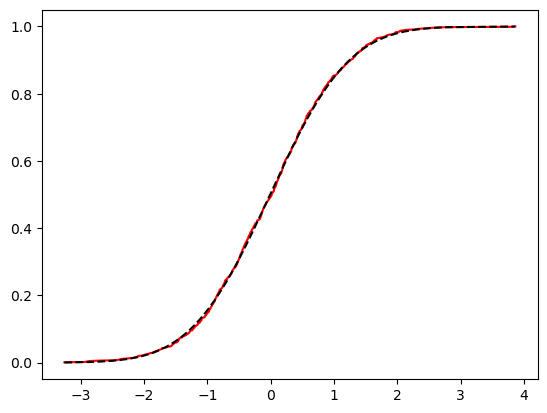

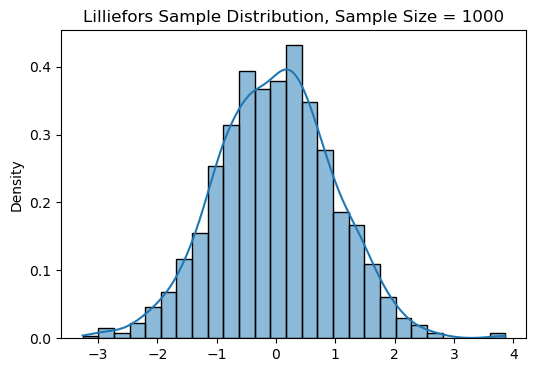

In [155]:
#using sample statistics now instead of set mu and sigma
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000
sample_size = 1000

rejections = []
for i in range(n_trials):
    data = np.sort(rng.normal(size=sample_size))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple 
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(data, kde=True, stat='density', label='Sample PDF')
sns.kdeplot(D)
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}')

In [156]:
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

0.033

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panda\AppData\Local\Temp\ipykernel_1324\988361338.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(D)


Text(0.5, 1.0, 'Lilliefors Sample Distribution, Sample Size = 1250')

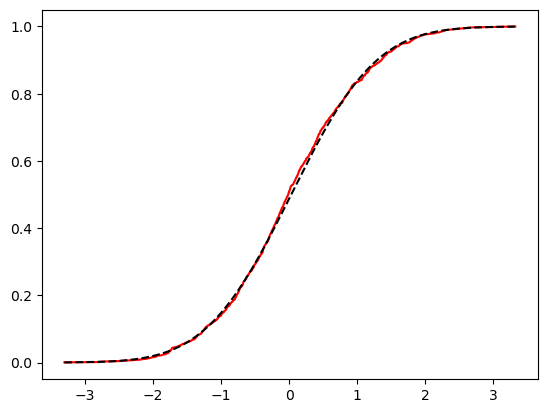

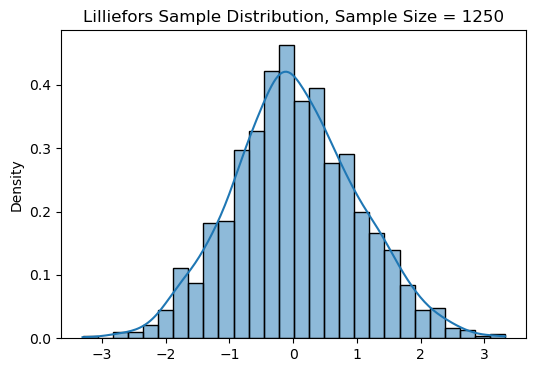

In [157]:
#sample size = 1250
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000
sample_size = 1250

rejections = []
for i in range(n_trials):
    data = np.sort(rng.normal(size=sample_size))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple 
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(data, kde=True, stat='density', label='Sample PDF')
sns.kdeplot(D)
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}')

In [158]:
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

0.039

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panda\AppData\Local\Temp\ipykernel_1324\1602879425.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(D)


Text(0.5, 1.0, 'Lilliefors Sample Distribution, Sample Size = 1500')

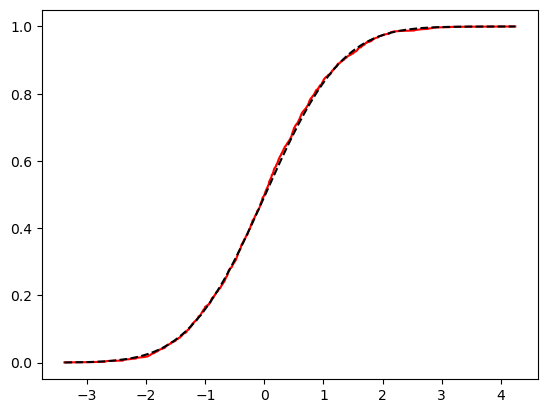

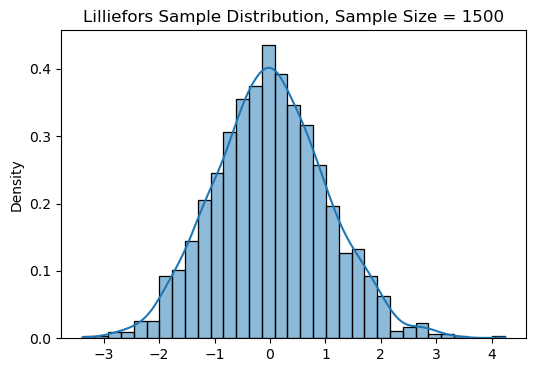

In [159]:
#sample size is 1500
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000
sample_size = 1500

rejections = []
for i in range(n_trials):
    data = np.sort(rng.normal(size=sample_size))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple 
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(data, kde=True, stat='density', label='Sample PDF')
sns.kdeplot(D)
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}')

In [160]:
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

0.037

In [44]:
#see effect of sample size 1500
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000
sample_size = 1500
m_simulations = 10 #get simulations 

rejection_rate_list = []
for simulations in range(m_simulations):
    rejections = []
    for i in range(n_trials):
        data = rng.normal(size=sample_size)
        #dist = norm estimates from each sample instead of using the known mu and std
        result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
        pvalue = result[1] #get p-value only of tuple 
        rejections.append(pvalue)
    rejection_rate = np.mean(np.array(rejections) < 0.05)
    rejection_rate_list.append(rejection_rate)

In [45]:
rejection_rate_list

[0.049, 0.039, 0.039, 0.041, 0.035, 0.048, 0.041, 0.046, 0.039, 0.038]

In [46]:
#see how the simulations to fluxuate between each trial
rejection_rate_df = pd.DataFrame(rejection_rate_list)
rejection_rate_df.describe()

,0
count,10.000000
mean,0.041500
std,0.004625
min,0.035000
25%,0.039000
50%,0.040000
75%,0.044750
max,0.049000


I noticed that everytime I ran the lilliefors test with a large sample size of 1500, I get fluxuating rejection rates that can be almost 1-2% in difference from the prior trial. Therefore, I created a dataframe to see the standard deviation and mean of the trials to see how a sample size of 1500 random normal data points fluxuated so much from our ideal rejection rate of 0.05. We should look into what is changing the rejection rate so much.

In [51]:
#see effect of sample size 2000
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000
sample_size = 2000
m_simulations = 10 #get simulations 

rejection_rate_list = []
for simulations in range(m_simulations):
    rejections = []
    for i in range(n_trials):
        data = rng.normal(size=sample_size)
        #dist = norm estimates from each sample instead of using the known mu and std
        result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
        pvalue = result[1] #get p-value only of tuple 
        rejections.append(pvalue)
    rejection_rate = np.mean(np.array(rejections) < 0.05)
    rejection_rate_list.append(rejection_rate)

In [52]:
rejection_rate_list

[0.055, 0.046, 0.056, 0.048, 0.053, 0.036, 0.051, 0.042, 0.054, 0.054]

In [53]:
#see how the simulations to fluxuate between each trial
rejection_rate_df = pd.DataFrame(rejection_rate_list)
rejection_rate_df.describe()

,0
count,10.000000
mean,0.049500
std,0.006502
min,0.036000
25%,0.046500
50%,0.052000
75%,0.054000
max,0.056000


Noticeably, the 2000 sample size random normal data has higher std than the 1500 samples data. The mean does approach 0.05 much closer than the small sample size. This could be due to the "table" approximation the function is taking. Because the table is making use of a very large (10,000,000) simulation to calculate the p-value of the test, it is interesting to see that it is not approximately mean = 0, std = 1. 

In [57]:
data = np.mean(rng.normal(size=sample_size))
data

-0.026347059357867644

In [88]:
for i in range(1000):
    data = rng.normal(size=2000)
    print(np.mean(data), np.std(data))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    #print(result)
    pvalue = result[1] #get p-value only of tuple 
    rejections.append(pvalue)
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

0.031856101061168936 1.0100029133957003
-0.0029116244151755543 0.9993728998497662
-0.03074737328924659 1.000281958241906
0.005383759947427693 0.9814226512191369
-0.026108239533801095 0.9907779906208586
0.007802503956999933 1.0041421036016591
0.008166826208219562 1.0159424222776405
0.014859134077246455 1.0020952686198588
0.013358065525794029 0.9961783298550326
-0.0027021485589152016 1.0076918292910892
-0.030582469821964282 0.9681121712939807
-0.018784207492884383 1.016159258396673
0.013084087351197017 1.0304942141947873
-0.005474392974153871 0.9914220743603789
-0.04111232811027382 0.9984722254000542
-0.006760004359582577 1.0042342227484717
-0.00378862899323974 0.9864034250570348
0.01376172405045127 0.9958135894371424
0.009854940084292397 0.9851646564093794
-0.012445403015548268 1.0063137616796072
0.0011214451985784653 0.9986214531578556
-0.020084415165193582 1.000402127958372
0.010162000022725794 1.0071350039734217
-0.00297237973153494 0.9840863039034699
-0.010631607872404653 1.01101471

0.05195530726256983

After the code above multiple times, it appears that the sample mean is what's causing the deviation to be so different, since the large sample size reduces variance but not bias. The sample mean seems to be fluxuating from our true mean of 0. 

**Conclusion**: The table method uses Monte Carlo simulations to approximate the distribution. The approximation can lead to slight bias/variance in the p-values. The lilliefor test table is also different than the ks-table. Tests like this with very high power (large n) will have a more noticeable difference on small effects.

#### **Now: showing how the test fails with autocorrelated data**

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panda\AppData\Local\Temp\ipykernel_1324\3688881303.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(D)


0.043

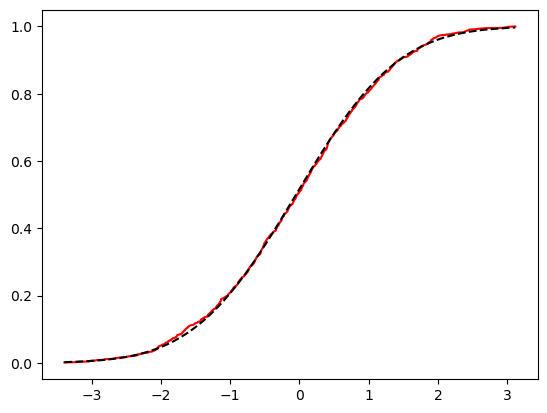

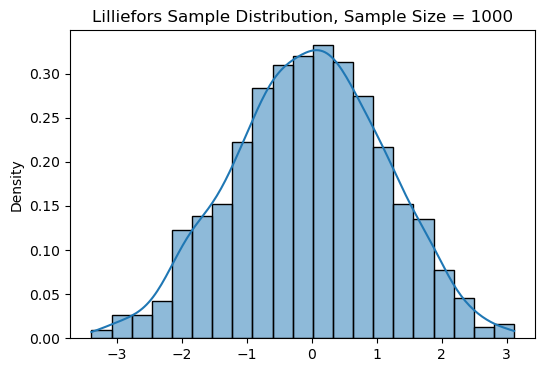

In [161]:
n_trials = 1000
sample_size = 1000

rejections = []
for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=0.5))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple 
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(data, kde=True, stat='density', label='Sample PDF')
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}')
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panda\AppData\Local\Temp\ipykernel_1324\4066253610.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(D)


0.04

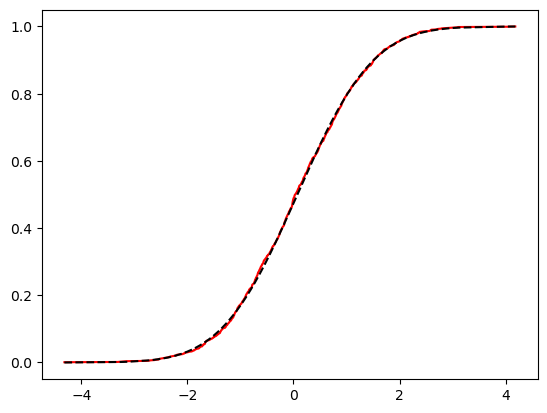

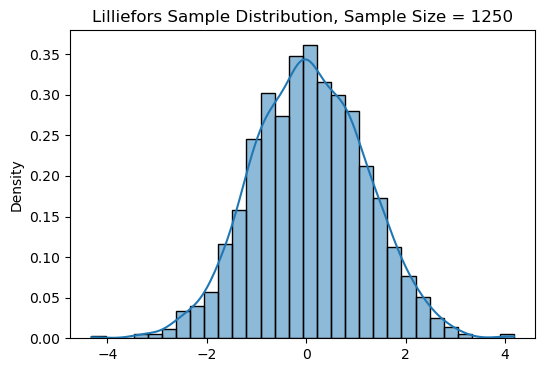

In [162]:
#sample size is 1250
n_trials = 1000
sample_size = 1250

rejections = []
for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=0.5))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple 
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(data, kde=True, stat='density', label='Sample PDF')
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}')
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0.064

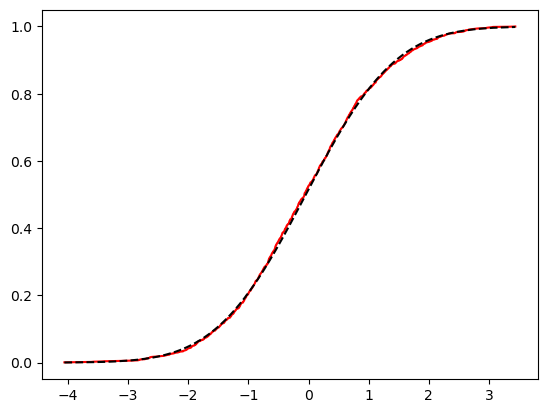

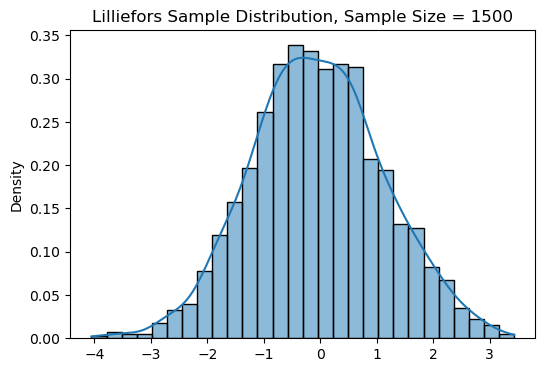

In [165]:
#sample size is 1500
n_trials = 1000
sample_size = 1500

rejections = []
for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=0.5))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple 
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(data, kde=True, stat='density', label='Sample PDF')
#sns.kdeplot(D)
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}')
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

The autocorrelated data is surprisingly close to 0.05, the theoretical empirical rejection rate.

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panda\AppData\Local\Temp\ipykernel_1324\3229999524.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(D)


0.05

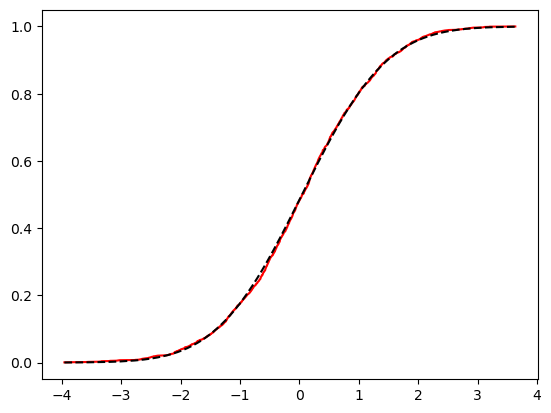

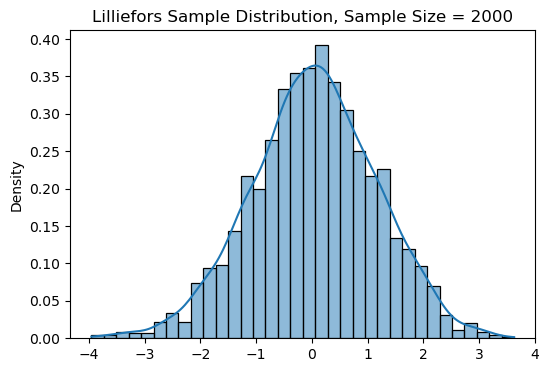

In [164]:
#sample size is 2000
n_trials = 1000
sample_size = 2000

rejections = []
for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=0.5))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple 
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(data, kde=True, stat='density', label='Sample PDF')
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}')
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

In [113]:
#see the avg and std of autocorrelated data
#see effect of sample size 2000
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000
sample_size = 2000
m_simulations = 10 #get simulations 

rejection_rate_list = []
for simulations in range(m_simulations):
    rejections = []
    for i in range(n_trials):
        data = generate_ar1(n=sample_size, phi=0.5)
        #dist = norm estimates from each sample instead of using the known mu and std
        result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
        pvalue = result[1] #get p-value only of tuple 
        rejections.append(pvalue)
    rejection_rate = np.mean(np.array(rejections) < 0.05)
    rejection_rate_list.append(rejection_rate)

In [114]:
rejection_rate_list

[0.051, 0.063, 0.073, 0.069, 0.067, 0.072, 0.064, 0.066, 0.066, 0.068]

In [115]:
#see how the simulations to fluxuate between each trial
rejection_rate_df = pd.DataFrame(rejection_rate_list)
rejection_rate_df.describe()

,0
count,10.000000
mean,0.065900
std,0.006118
min,0.051000
25%,0.064500
50%,0.066500
75%,0.068750
max,0.073000


With a phi of 0.2, the test rejects close to 0.05 of all observations. With a phi of 0.5, the data is much correlated and has a greater failure rate.

In [77]:
#making autocorrelation plot with different phi's, sample size n, differerent type I error
phi_vals = [0, 0.2, 0.4, 0.8]
mu, sigma = 0, 1
n_trials = 1000
sample_size = 1000
m_simulations = 1000 

rejection_rates = []
for i in range(len(phi_vals)):
    rejections = []
    for j in range(n_trials):
        data = generate_ar1(n = sample_size, phi = phi_vals[i])
        result = lilliefors(data, dist='norm', pvalmethod='table')
        pvalue = result[1] #get p-value only of tuple 
        rejections.append(pvalue)
    rejection_rate = np.mean(np.array(rejections) < 0.05)
    rejection_rates.append(rejection_rate)

In [78]:
rejection_rates

[0.037, 0.036, 0.038, 0.175]

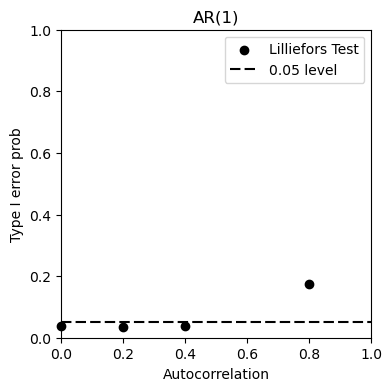

In [79]:
fig, ax = plt.subplots(figsize = (4,4))
plt.scatter(phi_vals, rejection_rates, color = 'black', clip_on=False, label='Lilliefors Test'); #show points on axes
plt.xticks(np.arange(0, 1.2, 0.2)); plt.yticks(np.arange(0, 1.2, 0.2)); 
plt.xlim(0, 1.0); plt.ylim(0, 1.0); #make plot look nicer
plt.axhline(y=0.05, color = 'k', linestyle='--', dashes = (5,2), label = '0.05 level');
ax.legend()
plt.xlabel('Autocorrelation'); plt.ylabel('Type I error prob'); plt.title('AR(1)');

Noticeably, Lilliefors failed less compared to the ks test.

### Shapiro-Wilk Test

#### **Now: showing how the standard test works with normal data**

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Rejection_rate: 0.048


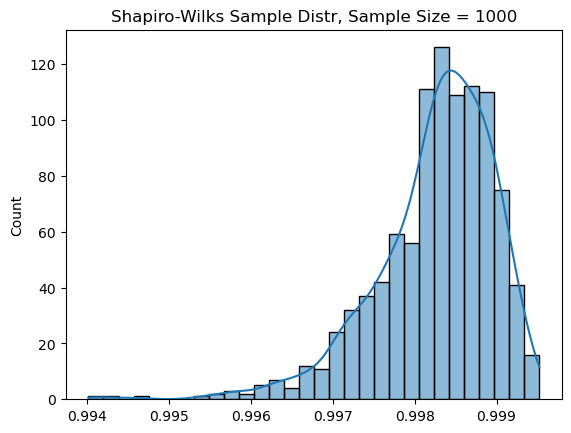

In [172]:
#using sample statistics now instead of set mu and sigma
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000
sample_size = 1000
stats_values = []

rejections = []
for i in range(n_trials):
    data = rng.normal(size=sample_size)
    result = stats.shapiro(data)
    stat, pval = stats.shapiro(data)
    stats_values.append(stat)
    rejections.append(pval)

stats_values = np.array(stats_values)
rejection_rate = np.mean(np.array(rejections) < 0.05)
sns.histplot(stats_values, bins=30, kde=True, edgecolor='black')
plt.title(f'Shapiro-Wilks Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Rejection_rate: 0.05


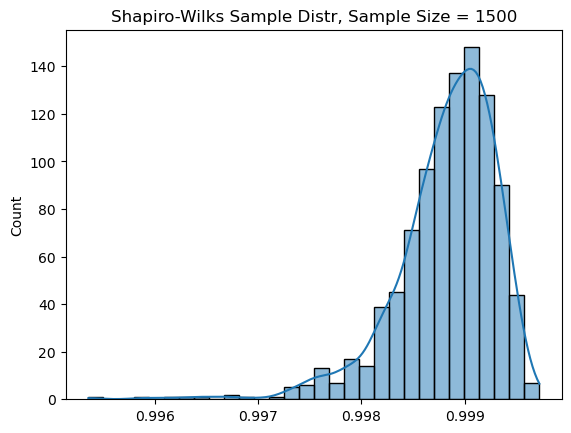

In [174]:
#sample size 1250
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000
sample_size = 1500
stats_values = []

rejections = []
for i in range(n_trials):
    data = rng.normal(size=sample_size)
    result = stats.shapiro(data)
    stat, pval = stats.shapiro(data)
    stats_values.append(stat)
    rejections.append(pval)

stats_values = np.array(stats_values)
rejection_rate = np.mean(np.array(rejections) < 0.05)
sns.histplot(stats_values, bins=30, kde=True, edgecolor='black')
plt.title(f'Shapiro-Wilks Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

#### **Now: showing how the test fails with autocorrelated data**

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Rejection_rate: 0.078


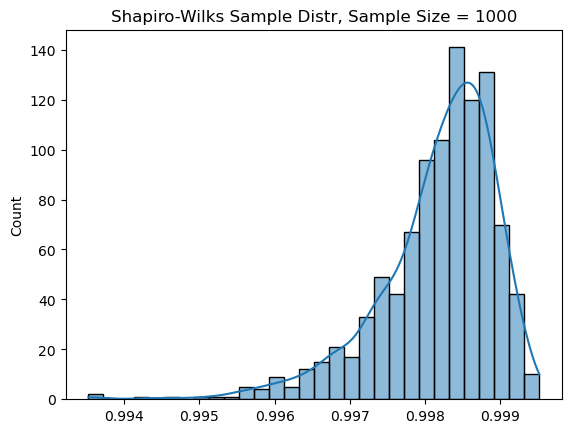

In [175]:
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000
sample_size = 1000
stats_values = []

rejections = []
for i in range(n_trials):
    data = generate_ar1(sample_size, phi=0.5)
    result = stats.shapiro(data)
    stat, pval = stats.shapiro(data)
    stats_values.append(stat)
    rejections.append(pval)

stats_values = np.array(stats_values)
rejection_rate = np.mean(np.array(rejections) < 0.05)
sns.histplot(stats_values, bins=30, kde=True, edgecolor='black')
plt.title(f'Shapiro-Wilks Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Rejection_rate: 0.099


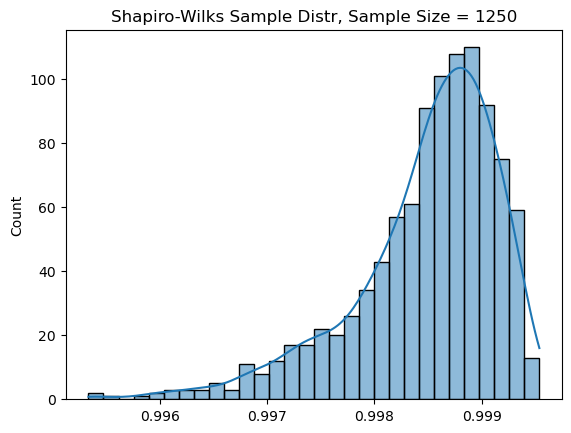

In [176]:
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000
sample_size = 1250
stats_values = []

rejections = []
for i in range(n_trials):
    data = generate_ar1(sample_size, phi=0.5)
    result = stats.shapiro(data)
    stat, pval = stats.shapiro(data)
    stats_values.append(stat)
    rejections.append(pval)

stats_values = np.array(stats_values)
rejection_rate = np.mean(np.array(rejections) < 0.05)
sns.histplot(stats_values, bins=30, kde=True, edgecolor='black')
plt.title(f'Shapiro-Wilks Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Rejection_rate: 0.074


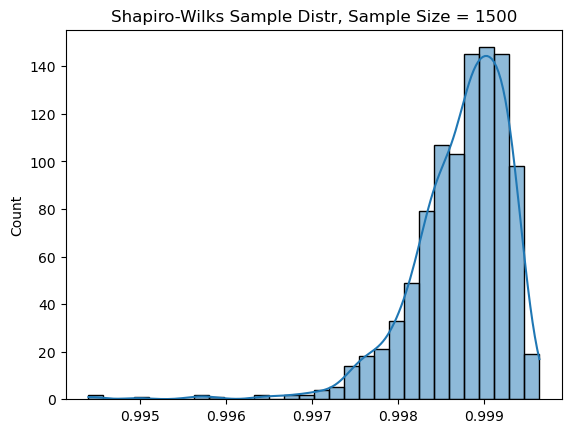

In [177]:
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000
sample_size = 1500
stats_values = []

rejections = []
for i in range(n_trials):
    data = generate_ar1(sample_size, phi=0.5)
    result = stats.shapiro(data)
    stat, pval = stats.shapiro(data)
    stats_values.append(stat)
    rejections.append(pval)

stats_values = np.array(stats_values)
rejection_rate = np.mean(np.array(rejections) < 0.05)
sns.histplot(stats_values, bins=30, kde=True, edgecolor='black')
plt.title(f'Shapiro-Wilks Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

In [92]:
#making autocorrelation plot with different phi's, sample size n, differerent type I error
phi_vals = [0, 0.2, 0.4, 0.8]
mu, sigma = 0, 1
n_trials = 1000
sample_size = 1000
m_simulations = 1000 

rejection_rates = []
for i in range(len(phi_vals)):
    rejections = []
    for j in range(n_trials):
        data = generate_ar1(n = sample_size, phi = phi_vals[i])
        result = stats.shapiro(data)
        pvalue = result[1] #get p-value only of tuple 
        rejections.append(pvalue)
    rejection_rate = np.mean(np.array(rejections) < 0.05)
    rejection_rates.append(rejection_rate)

In [93]:
rejection_rates

[0.056, 0.04, 0.063, 0.319]

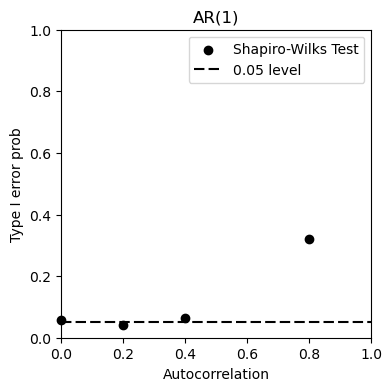

In [94]:
fig, ax = plt.subplots(figsize = (4,4))
plt.scatter(phi_vals, rejection_rates, color = 'black', clip_on=False, label='Shapiro-Wilks Test'); #show points on axes
plt.xticks(np.arange(0, 1.2, 0.2)); plt.yticks(np.arange(0, 1.2, 0.2)); 
plt.xlim(0, 1.0); plt.ylim(0, 1.0); #make plot look nicer
plt.axhline(y=0.05, color = 'k', linestyle='--', dashes = (5,2), label = '0.05 level');
ax.legend()
plt.xlabel('Autocorrelation'); plt.ylabel('Type I error prob'); plt.title('AR(1)');

### Anderson-Darling Test

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Rejection_rate: 0.042


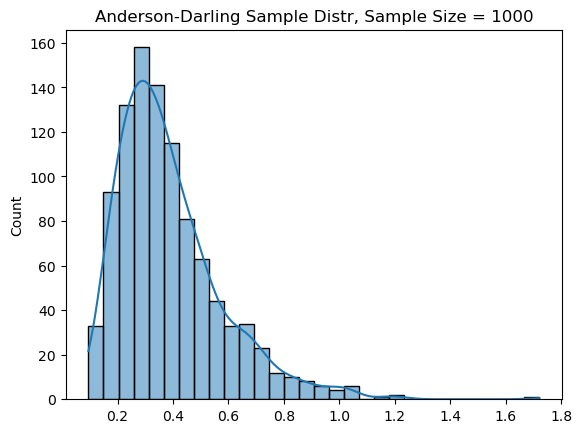

In [181]:
#using sample statistics now instead of set mu and sigma
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000
sample_size = 1000

AD_stats = []
rejections = []
for i in range(n_trials):
    data = rng.normal(size=sample_size)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats, bins=30, kde=True, edgecolor='black')
plt.title(f'Anderson-Darling Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Rejection_rate: 0.035


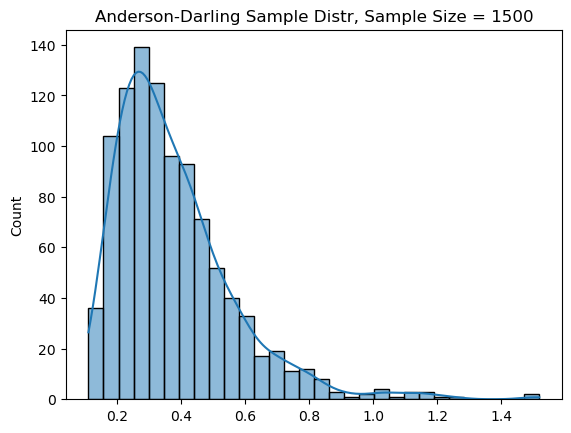

In [185]:
#sample size 1500
#using sample statistics now instead of set mu and sigma
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000
sample_size = 1500

AD_stats = []
rejections = []
for i in range(n_trials):
    data = rng.normal(size=sample_size)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats, bins=30, kde=True, edgecolor='black')
plt.title(f'Anderson-Darling Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

#### **Now: showing how the test fails with autocorrelated data**

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Rejection_rate: 0.06


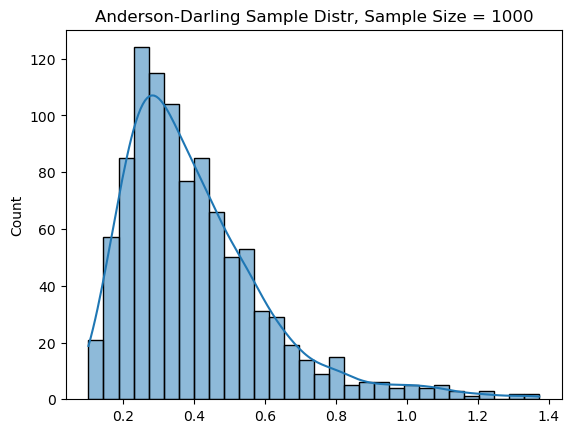

In [187]:
n_trials = 1000
sample_size = 1000

AD_stats = []
rejections = []
for i in range(n_trials):
    data = generate_ar1(sample_size, phi=0.5)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats, bins=30, kde=True, edgecolor='black')
plt.title(f'Anderson-Darling Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Rejection_rate: 0.057


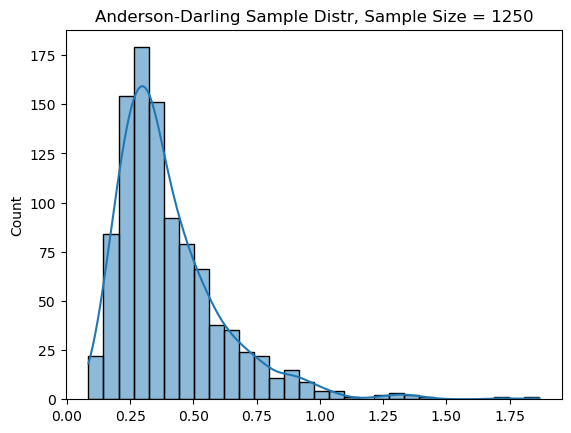

In [188]:
#sample_size = 1250
n_trials = 1000
sample_size = 1250

AD_stats = []
rejections = []
for i in range(n_trials):
    data = generate_ar1(sample_size, phi=0.5)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats, bins=30, kde=True, edgecolor='black')
plt.title(f'Anderson-Darling Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Rejection_rate: 0.061


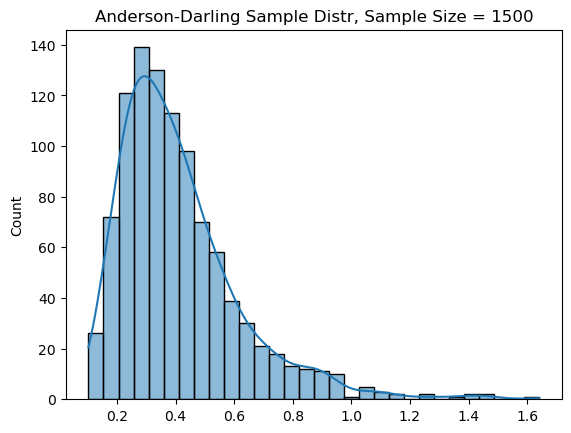

In [191]:
#sample size = 1500
n_trials = 1000
sample_size = 1500

AD_stats = []
rejections = []
for i in range(n_trials):
    data = generate_ar1(sample_size, phi=0.5)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats, bins=30, kde=True, edgecolor='black')
plt.title(f'Anderson-Darling Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

**Conclusion**: The resulting rejection_rates are probably due to sampling variability.

In [192]:
#making autocorrelation plot with different phi's, sample size n, differerent type I error
phi_vals = [0, 0.2, 0.4, 0.8]
mu, sigma = 0, 1
n_trials = 1000
sample_size = 1000
m_simulations = 1000 

rejection_rates = []
for i in range(len(phi_vals)):
    rejections = []
    for j in range(n_trials):
        data = generate_ar1(n = sample_size, phi = phi_vals[i])
        result = stats.anderson(data, dist='norm')
        #does not return p-value in fn 
        stat = result.statistic
        crit_vals = result.critical_values
        sig_levels = result.significance_level/100
        reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
        rejections.append(reject)
    rejection_rate = np.mean(np.array(rejections) < 0.05)
    rejection_rates.append(rejection_rate)

In [193]:
rejection_rates

[0.941, 0.958, 0.949, 0.759]

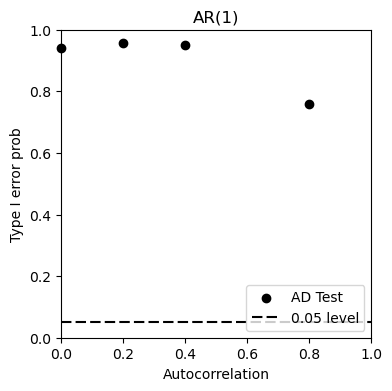

In [194]:
fig, ax = plt.subplots(figsize = (4,4))
plt.scatter(phi_vals, rejection_rates, color = 'black', clip_on=False, label='AD Test'); #show points on axes
plt.xticks(np.arange(0, 1.2, 0.2)); plt.yticks(np.arange(0, 1.2, 0.2)); 
plt.xlim(0, 1.0); plt.ylim(0, 1.0); #make plot look nicer
plt.axhline(y=0.05, color = 'k', linestyle='--', dashes = (5,2), label = '0.05 level');
ax.legend(loc = 'lower right')
plt.xlabel('Autocorrelation'); plt.ylabel('Type I error prob'); plt.title('AR(1)');